In [2]:
from tensorflow.keras.applications.vgg16 import VGG16

In [3]:
model = VGG16(weights='imagenet')

553467096/553467096 [==============================] - 119s 0us/step


In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

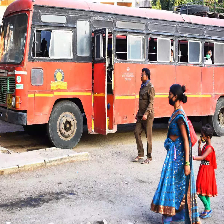

In [15]:
img_path = 'files/msrtc.jpg'
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
display(img)

In [16]:
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

In [17]:
#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
p = decode_predictions(features)

1/1 [==============================] - 0s 413ms/step


In [18]:
p

[[('n04487081', 'trolleybus', 0.57291734),
  ('n03769881', 'minibus', 0.19108312),
  ('n03345487', 'fire_engine', 0.0923261),
  ('n04065272', 'recreational_vehicle', 0.04264596),
  ('n03895866', 'passenger_car', 0.030237488)]]

In [19]:
cls = ""
maxn = 0;
for i in range(len(p[0])):
    if(maxn<p[0][i][2]):
        cls= p[0][i][1]
        maxn = p[0][i][2]
cls

'trolleybus'